# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [3]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [ ]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 4.1 MB/s eta 0:00:01     |████████████████████▍           | 23.7 MB 4.1 MB/s eta 0:00:04
     |████████████████████████████████| 19.3 MB 62.5 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 63.0 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 65.6 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 66.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 60.7 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 72.2 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 72.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 65.8 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 56.4 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 7.1 MB/s  eta 0:00:01
     |███████████████████

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
train_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
test_transform = transforms.Compose([transforms.ToTensor()])
                                      
# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
testset = torchvision.datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

For training, I normalized the data to bring the greyscale within a standard set of numbers   and I changed the image to a tensor to feed it into the Neural Network

For testing, I just changed the image to a tensor

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

4


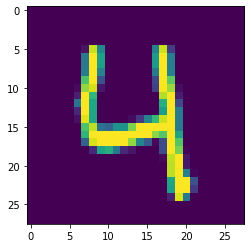

8


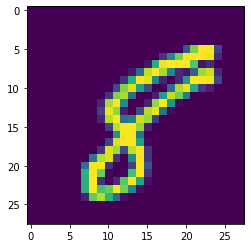

6


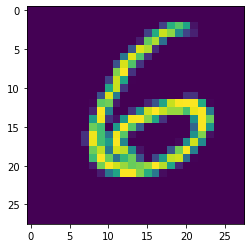

7


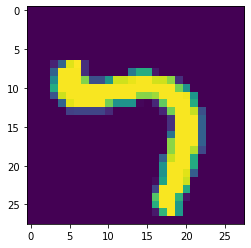

5


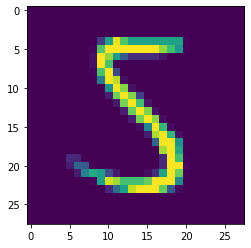

In [4]:
# Explore data
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [18]:
class MNISTNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flattenlayer = nn.Flatten()
        self.inputlayer = nn.Linear(784, 512)
        self.hidden1 = nn.Linear(512, 256)
        self.hidden2 = nn.Linear(256, 128)
        self.hidden3 = nn.Linear(128, 64)
        self.outputlayer = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        x = self.flattenlayer(x)
        x = F.relu(self.inputlayer(x))
        x = self.dropout(x)
        x = F.relu(self.hidden1(x))
        x = self.dropout(x)        
        x = F.relu(self.hidden2(x))
        x = self.dropout(x)
        x = self.hidden3(x)
        x = F.log_softmax(self.outputlayer(x), dim=1)
        
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MNISTNeuralNetwork()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [20]:
num_epochs = 10

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(trainloader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(trainloader):.2f}% training loss: {train_loss/len(trainloader):.5f}')
    train_loss_history.append(train_loss/len(trainloader))

    val_loss = 0.0
    val_correct = 0
    model.eval()
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(testloader):.2f}% validation loss: {val_loss/len(testloader):.5f}')
    val_loss_history.append(val_loss/len(testloader))

Epoch 1 training accuracy: 54.65% training loss: 0.45771
Epoch 1 validation accuracy: 57.91% validation loss: 0.29206
Epoch 2 training accuracy: 59.31% training loss: 0.25100
Epoch 2 validation accuracy: 58.92% validation loss: 0.24804
Epoch 3 training accuracy: 60.05% training loss: 0.20844
Epoch 3 validation accuracy: 58.94% validation loss: 0.23013
Epoch 4 training accuracy: 60.56% training loss: 0.18424
Epoch 4 validation accuracy: 59.17% validation loss: 0.22320
Epoch 5 training accuracy: 60.79% training loss: 0.16646
Epoch 5 validation accuracy: 60.41% validation loss: 0.17213
Epoch 6 training accuracy: 61.06% training loss: 0.15556
Epoch 6 validation accuracy: 58.99% validation loss: 0.23068
Epoch 7 training accuracy: 61.17% training loss: 0.14797
Epoch 7 validation accuracy: 60.42% validation loss: 0.17290
Epoch 8 training accuracy: 61.33% training loss: 0.14056
Epoch 8 validation accuracy: 59.91% validation loss: 0.19843
Epoch 9 training accuracy: 61.50% training loss: 0.13203

Plot the training loss (and validation loss/accuracy, if recorded).

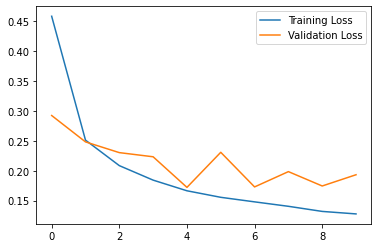

In [21]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [24]:
model.eval()
for images, labels in testloader:
    val_correct = 0
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs.data, 1)
    val_correct += (preds == labels).sum().item()
    print(f'Test accuracy: {val_correct/len(testloader)*100:.2f}%')

Test accuracy: 38.22%
Test accuracy: 37.58%
Test accuracy: 38.85%
Test accuracy: 37.58%
Test accuracy: 38.85%
Test accuracy: 37.58%
Test accuracy: 40.76%
Test accuracy: 38.85%
Test accuracy: 38.85%
Test accuracy: 38.85%
Test accuracy: 38.22%
Test accuracy: 37.58%
Test accuracy: 38.85%
Test accuracy: 39.49%
Test accuracy: 38.22%
Test accuracy: 38.22%
Test accuracy: 37.58%
Test accuracy: 38.22%
Test accuracy: 37.58%
Test accuracy: 36.94%
Test accuracy: 38.22%
Test accuracy: 36.31%
Test accuracy: 40.13%
Test accuracy: 38.22%
Test accuracy: 39.49%
Test accuracy: 38.22%
Test accuracy: 40.13%
Test accuracy: 38.22%
Test accuracy: 38.85%
Test accuracy: 40.13%
Test accuracy: 39.49%
Test accuracy: 40.13%
Test accuracy: 36.31%
Test accuracy: 38.22%
Test accuracy: 36.94%
Test accuracy: 36.94%
Test accuracy: 37.58%
Test accuracy: 38.85%
Test accuracy: 37.58%
Test accuracy: 36.94%
Test accuracy: 38.85%
Test accuracy: 39.49%
Test accuracy: 40.76%
Test accuracy: 38.85%
Test accuracy: 38.85%
Test accur

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = MNISTNeuralNetwork()
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [27]:
num_epochs = 5

# Establish a list for our history
train_loss_history = list()
val_loss_history = list()

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(trainloader):
        # data is a list of [inputs, labels]
        inputs, labels = data

        # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(trainloader):.2f}% training loss: {train_loss/len(trainloader):.5f}')
    train_loss_history.append(train_loss/len(trainloader))

    val_loss = 0.0
    val_correct = 0
    model.eval()
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(testloader):.2f}% validation loss: {val_loss/len(testloader):.5f}')
    val_loss_history.append(val_loss/len(testloader))

Epoch 1 training accuracy: 34.81% training loss: 1.30875
Epoch 1 validation accuracy: 6.58% validation loss: 5.58587
Epoch 2 training accuracy: 35.75% training loss: 1.29512
Epoch 2 validation accuracy: 6.61% validation loss: 3.51393
Epoch 3 training accuracy: 35.94% training loss: 1.26470
Epoch 3 validation accuracy: 7.60% validation loss: 2.44569
Epoch 4 training accuracy: 35.60% training loss: 1.28497
Epoch 4 validation accuracy: 8.76% validation loss: 2.44572
Epoch 5 training accuracy: 33.21% training loss: 1.37774
Epoch 5 validation accuracy: 18.11% validation loss: 2.01156


In [28]:
model.eval()
for images, labels in testloader:
    val_correct = 0
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, preds = torch.max(outputs.data, 1)
    val_correct += (preds == labels).sum().item()
    print(f'Test accuracy: {val_correct/len(testloader)*100:.2f}%')

Test accuracy: 11.46%
Test accuracy: 7.64%
Test accuracy: 11.46%
Test accuracy: 11.46%
Test accuracy: 13.38%
Test accuracy: 13.38%
Test accuracy: 10.19%
Test accuracy: 9.55%
Test accuracy: 10.83%
Test accuracy: 12.10%
Test accuracy: 11.46%
Test accuracy: 8.92%
Test accuracy: 12.74%
Test accuracy: 11.46%
Test accuracy: 15.92%
Test accuracy: 11.46%
Test accuracy: 14.01%
Test accuracy: 14.01%
Test accuracy: 14.01%
Test accuracy: 8.92%
Test accuracy: 10.83%
Test accuracy: 9.55%
Test accuracy: 14.01%
Test accuracy: 9.55%
Test accuracy: 13.38%
Test accuracy: 8.92%
Test accuracy: 8.92%
Test accuracy: 10.19%
Test accuracy: 11.46%
Test accuracy: 7.01%
Test accuracy: 12.10%
Test accuracy: 14.65%
Test accuracy: 9.55%
Test accuracy: 10.83%
Test accuracy: 8.28%
Test accuracy: 15.92%
Test accuracy: 9.55%
Test accuracy: 9.55%
Test accuracy: 14.65%
Test accuracy: 14.65%
Test accuracy: 8.92%
Test accuracy: 14.65%
Test accuracy: 15.92%
Test accuracy: 9.55%
Test accuracy: 11.46%
Test accuracy: 14.01%
Tes

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
torch.save(model)